# Implementasi CNN pada MNIST Dataset

Outline dari notebook ini dijabarkan sebagai berikut:

1. **Pendahuluan**  
  
2. **Data pre-processing**  
     2.1. Memuat Data  
     2.2. Memeriksa Bentuk dan Tipe Data  
     2.3. Ekstraksi x_train dan y_train  
     2.4. Visualisasi  
     2.5. Normalisasi  
     2.6. Menyesuaikan Shape dari Dataset  
     2.7. One-Hot Encoding  
     2.8. Memisahkan Data Training dan Data Validation      
      
3. **Convolutional Neural Network**  
    3.1. Pendahuluan tentang CNN  
    3.2. Membangun Arsitektur CNN dengan Keras  
    3.3. Konfigurasi Kompilasi Model CNN  
    3.4. Fitting Model CNN  

4. **Analisis Hasil**  
    4.1. Melakukan Visualisasi / Plotting Loss dan Accuracy  
    4.2. Melakukan Visualisasi / Plotting Confusion Matrix  
    4.4. Melakukan Visualisasi / Plotting Error  
  
5. **Prediksi Data Test dan Penyimpanan**  
    5.1. Prediksi Data  
    5.2. Menyimpan Hasil Prediksi dan Model CNN  

<hr>
# 1. Pendahuluan

__MNIST-Dataset__ merupakan sebuah dataset *handwritten-digits* besar yang umumnya digunakan untuk melakukan training dan testing untuk bidang ilmu *Machine Learning*. MNIST-Dataset memiliki ribuan training images dan ribuan testing images dan memiliki resolusi 28x28 pixel. MNIST-Dataset memiliki keunggulan bahwa seluruh gambarnya telah diproses sedemikian rupa (pengolahan citra sepert: *cropping*, *centering*, *binarization*) sehingga seluruh gambarnya dapat langsung dijadikan input pada model learning yang akan kita buat. Berikut merupakan beberapa contoh gambar dari MNIST-Dataset.

<p>
    <img src="images/mnist_dataset.png" > </img>
</p>
<p>
    <center><em>Gambar 1. Handwritten Digit, MNIST Dataset</em></center>
</p>

Tujuan dari Notebook ini adalah membangun sebuah *Deep Neural Network* menggunakan Arsitektur *Convolutional Neural Network* untuk melakukan klasifikasi *handwritten-digits* dari MNIST dataset. 

<hr>

# 2. Data Preprocessing

Perlu diingat, meskipun seluruh gambar pada MNIST-Dataset telah melalui tahap pre-process (dalam pengolahan citra), bukan berarti kita tidak melakukan *pre-processing* saat kita akan membuat model. *Pre-processing* dalam konteks *Neural Network* atau *Deep Neural Network* merupakan sebuah proses untuk mengolah data masukan kita sedemikian rupa agar cocok dengan input yang dibutuhkan untuk model learning kita.

In [6]:
# beberapa library yang dibutuhkan untuk pre-processing

import numpy as np # linear algebra, matrix multiplications
import pandas as pd # data processing, CSV file I/O

# 2.1 Memuat Data

MNIST dataset terpublikasi secara online dan dapat diunduh perorangan. Dalam latihan ini, MNIST dataset (berupa file CSV) telah diunduh dan siap untuk digunakan. Terdapat dua buah terminologi mengenai data yang akan selalu kita pakai:

* __train__:
data train merupakan data yang kita butuhkan untuk melatih model CNN kita.

* __test__:
data test merupakan data yang kita butuhkan untuk menguji seberapa baik CNN kita.

In [7]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

## 2.2 Memeriksa Bentuk dan Tipe Data

Ada baiknya kita melakukan pemeriksaan bentuk dan tipe data dari dataset yang kita gunakan. Hal ini ditujukan agar kita mengenal betul properti dari dataset tersebut sehingga kita dapat mengoperasikannya dengan baik.

   * __train__:  
train dataframe terdiri dari 42,000 gambar.  
data dari setiap gambar disusun menjadi vektor 1D dengan jumah 728 kolom (28x28)  
kolom pertama merupakan kolom *class* dari gambar tersebut    

   * __test__:  
test dataframe terdiri dari 28,000 gambar.  
data dari setiap gambar disusun menjadi vektor 1D dengan jumah 728 kolom (28x28)  
data ini akan diumpankan ke CNN sehingga merupakan data baru, yang belum pernah dilihat CNN sebelumnya.

### Memeriksa Tipe Data

In [9]:
# memeriksa tipe data
print('Tipe data variable train :', type(train))
print('Tipe data variable test  :', type(test))

Tipe data variable train : <class 'pandas.core.frame.DataFrame'>
Tipe data variable test  : <class 'pandas.core.frame.DataFrame'>


### Memeriksa Bentuk Data

In [10]:
# memeriksa bentuk data
print('Shape dari variable train : ', train.shape)
print('Shape dari variable test  : ', test.shape)

# memeriksa jumlah data
num_train = len(train.values) 
num_test = len(test.values) 
print('\nJumlah training data : ', num_train, 'pasang gambar dan class/label')
print('Jumlah test data     : ', num_test, 'gambar')

Shape dari variable train :  (42000, 785)
Shape dari variable test  :  (28000, 784)

Jumlah training data :  42000 pasang gambar dan class/label
Jumlah test data     :  28000 gambar


### Memeriksa Isi Data

In [11]:
# menunjukkan 10 data pertama dari train dataset kita
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# menunjukkan 10 data pertama dari test dataset kita
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#mengambil isi 1 buah data gambar tertentu
label_and_image = train.values[0]
print(label_and_image)

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250
 253  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247
 253 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  29 207 253 235  77   

## 2.3 Ekstraksi x_train dan y_train

x_train dan y_train adalah nama terminologi yang umum digunakan pada pemrograman *Deep Learning*.

Seperti yang kita ketahui dari pembahasan 2.2, spesifikasi data kita ialah sebagai berikut: kolom pertama (kolom 0) merupakan kolom class dan sisanya (kolom 1 sampai kolom 765) merupakan kolom-kolom yang berisi data gambar kita, berupa pixel. Kita harus memisahkan kedua bagian ini ke dua buah variable berbeda. 

* __x_train__ Variable yang akan kita gunakan untuk menyimpan data gambar kita. Akan berupa matrix dengan baris sejumlah banyaknya gambar, dan kolom sejumlah banyaknya pixel.
* __y_train__ Variable yang akan kita gunakan untuk menyimpan class dari data yang bersangkutan. Akan berupa vektor berisi class dengan baris sejumlah banyaknya gambar kita.

In [15]:
#untuk ytrain, ambil kolom yang memiliki heading label
ytrain_raw = train["label"]
print("Shape dari variable ytrain_raw: ", ytrain_raw.shape)

#untuk xtrain, hilangkan kolom yang bernama label
xtrain_raw = train.drop("label", axis=1)
print("Shape dari variable xtrain_raw: ", xtrain_raw.shape)

Shape dari variable ytrain_raw:  (42000,)
Shape dari variable xtrain_raw:  (42000, 784)


In [17]:
#mari kita telaah informasi dimensi dari gambar kita
from math import sqrt

#ambil jumlah kolom dari x_train raw (yang merepresentasikan jumlah pixel)
jumlah_pixel = xtrain_raw.shape[1]

#akar kuadratkan jumlah pixel kita = jumlah pixel setiap sisi (dimensi)
dim = int(sqrt(jumlah_pixel))

#cetak
print("Gambarnya berdimensi: {}x{}.".format(dim, dim))

Gambarnya berdimensi: 28x28.


In [18]:
#kita lihat 5 data pertama dari ytrain kita
ytrain_raw.head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

## 2.4 Visualisasi

Jika penasaran bagaimana sebenarnya wujud dari data yang kita miliki, kita bisa melakukan visualisasi data kita. Mari kita plot sembilan gambar pertama dari dataset (yang tentunya tidak tersusun berdasarkan digit). Gambar dari MNIST dataset hanya memiliki satu channel warna (grayscale) dan merupakan gambar biner, maksudnya adalah nilai intensitas warna mereka antara hitam (0) dan putih (255).

Pengaturan gambar seperti ini sebenarnya membuat klasifikasi menjadi sangat lebih mudah. Coba bayangkan model *Deep Network* yang menerima digit berwarna, entah itu solid, bergradasi, atau bahkan berwarna-warni. Bisa saja beberapa bagian dari *Deep Network* kita justru hanya fokus mempelajari bagaimana membedakan digit dari warnanya bukan dari bentuknya.

### Visualisasi Satu Gambar

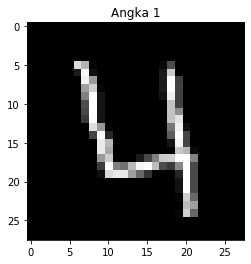

In [27]:
# kita membutuhkan beberapa class dari library matplotlib untuk melakukan visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# izinkan matplotlib menggambar pada jupyter notebook
%matplotlib inline

# konversi train dataset menjadi berformat (num_images, img_rows, img_cols) agar kita bisa plot mereka
xtrain_vis = xtrain_raw.values.reshape(num_train, dim, dim)

#tunjukkan gambar menggunakan pyplot
plt.imshow(xtrain_vis[3], cmap=plt.get_cmap('gray'))  #pilih data yang ingin di visualisasikan
plt.title("Angka {}".format(ytrain_raw[0]))           #tulis judul gambarnya
plt.show()                                            #tampilkan

### Visualisasi Banyak Gambar Sekaligus

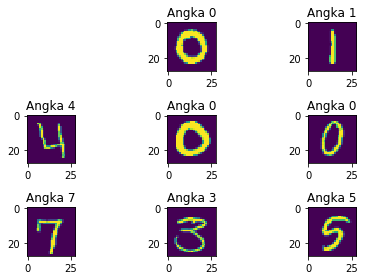

In [25]:
# berikut merupakan snippet program untuk melakukan visualisasi gambar dengan subplot
# (sumber dari --> https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)

# mari kita plot 9 gambar pertama dalam xtrain_vis kita
for i in range(1,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(xtrain_vis[i])
    plt.title("Angka {}".format(ytrain_raw[i]));

#supaya tampilannya enggak dempet2
plt.tight_layout()

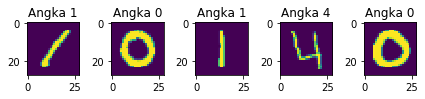

In [28]:
# mari kita plot 5 gambar pertama
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(xtrain_vis[i])
    plt.title("Angka {}".format(ytrain_raw[i]));

#supaya tampilannya enggak dempet2
plt.tight_layout()

## 2.5 Normalisasi

Pixel pada gambar direpresentasikan dalam bentuk rentang nilai integer, yakni dari 0 sampai 255. Deep Network tidak menyukai nilai dalam bentuk seperti ini, alasan singkatnya adalah nilai 0-255 itu nilai yang relatif terlalu besar dan Deep Network akan membutuhkan waktu lebih lama untuk *converge*. Umumnya nilai harus direpresentasikan dalam rentang nilai 0 sampai 1. Jadi kita harus mengkonversi rentang nilai [0-255] menjad [0-1]. Proses ini disebut normalisasi.

> Alasan lebih detail: [Why we normalize inputs](https://www.youtube.com/watch?v=UIp2CMI0748)

In [30]:
# normalisasikan data
xtrain_normalized = xtrain_raw / 255.0
test_normalized = test / 255.0

xtrain_normalized.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.6 Menyesuaikan Shape dari Dataset

Kita ingin membangun CNN, yang prosedur utamanya ialah melakukan konvolusi 2D. Agar model kita dapat melakukan konvolusi sebagaimana semestinya, kita harus menyesuaikan shape dari dataset kita, mengubahnya dari vector 1D menjadi matrix 2D. 

Berdasarkan pembahasan 2.2, shape dari xtrain kita adalah (42000, 784) yang berarti terdapat 42000 data gambar (baris) dan masing-masing gambar memiliki 784 dimensi (kolom). Mari kita bentuk kembali gambar kita menjadi gambar yang memiliki resolusi 28x28, sedemikian sehingga shape dari data xtrain kita menjadi (42000,28,28,1)

> __Catatan__: angka satu pada (42000,28,28,1) menunjukkan channel warna dari gambar kita. Meskipun kita tahu bahwa gambar kita hanya memiliki satu buah channel dan tidak ada bedanya dengan (42000,28,28), namun ada baiknya kita tetap membiasakan diri menuliskannya dimensi channelnya secara eksplisit.  
>  
>Alasannya karena pada permasalahan dunia nyata, kita tidak selalu berhadapan dengan dataset yang memiliki satu buah channel. Kadang kita bisa saja berhadapan dengan dataset yang memiliki tiga buah channel (RGB), sedemikian sehingga dimensi yang dibutuhkan menjadi (42000,28,28,3)

In [31]:
#reshape variable kita menjadi (jumlah_data, dimensi-x, dimensi-y, 1)
#ingat, kita sudah menyimpan jumlah data didalam variable ntrain dan ntest
xtrain = xtrain_normalized.values.reshape(num_train, dim, dim, 1)
test = test_normalized.values.reshape(num_test, dim, dim, 1)

#cetak beberapa informasi yang kita butuhkan
print("Shape xtrain sebelum, pixel berbentuk vektor 1D:", xtrain_normalized.shape)
print("Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix:", xtrain.shape)

print("\nShape test sebelum, pixel berbentuk vektor 1D:", test_normalized.shape)
print("Shape test sesudah, pixel berbentuk 28x28x1 3D matrix:", test.shape)

Shape xtrain sebelum, pixel berbentuk vektor 1D: (42000, 784)
Shape xtrain sesudah, pixel berbentuk 28x28x1 3D matrix: (42000, 28, 28, 1)

Shape test sebelum, pixel berbentuk vektor 1D: (28000, 784)
Shape test sesudah, pixel berbentuk 28x28x1 3D matrix: (28000, 28, 28, 1)


Beberapa hal penting yang perlu diperhatikan dalam tahap ini:

* Gambar umumnya memiliki ukuran yang jauh lebih besar

Pada kasus ini, gambar kita hanya memiliki ukuran (28,28,1). Umumnya, gambar tersedia dalam ukuran yang jauh lebih besar, misal: (3120,4160x,3). Jika kita menemukan gambar sebesar itu, ada baiknya kita *resize* gambar tersebut, setidak-tidaknya menjadi berukuran (64,64,3). Ukuran gambar besar akan membuat proses training kita terlampau lama.

* Gambar umumnya tidak memiliki dimensi yang sama

Perbedaan dimensi pada gambar membawa permasalahan tersendiri karena pada bagian *fully-connected-layers* pada akhir dari arsitektur CNN memiliki jumlah neuron yang tetap yang tidak dapat diubah secara dinamis. Ini berarti bahwa layer mengharapkan dimensi gambar tetap, yang berarti semua gambar harus diubah ukurannya ke dimensi yang sama sebelum *training*. 

## 2.7 One-Hot Encoding

Seperti yang sudah kita lihat di pembahasan 2.2, kolom class/label yang tersedia dalam MNIST dataset memiliki rentang [0-9]. Bentuk ini sangat intuitif bagi kita, tetapi tidak bagi *Deep Network*. Kita harus mengubah bentuk label tersebut (range [0-9]) menjadi format terkategorisasi (contoh: 0 -> [1,0,0,0,0,0,0,0,0,0]. Proses ini disebut dengan *One-Hot Encoding*.

<p>
    <img src="images/onehot_encoding.png" width=500></img>
</p>
<p>
    <center><em>Gambar 2. Ilustrasi One-hot Encoding</em></center>
</p>

> Alasan lebih detail: [Why we need one-hot encoding in Machine Learning](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [32]:
# class to_categorical kita butuhkan dari library keras
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [20]:
#nclasses = ytrain_raw.max() - ytrain_raw.min() + 1
nclasses = 10

#cetak bentuk ytrain sebelum
print("Tipe data ytrain sebelum : ", type(ytrain_raw))
print("Shape ytrain sebelum     : ", ytrain_raw.shape)

#melakukan one-hot encoding
ytrain = to_categorical(ytrain_raw, num_classes = nclasses)

#cetak bentuk ytrain sesudah
print("\nTipe data ytrain sesudah : ", type(ytrain))
print("Shape ytrain sesudah     : ", ytrain.shape)

Tipe data ytrain sebelum :  <class 'pandas.core.series.Series'>
Shape ytrain sebelum     :  (42000,)

Tipe data ytrain sesudah :  <class 'numpy.ndarray'>
Shape ytrain sesudah     :  (42000, 10)


In [21]:
#cetak isinya, sebelum dan sesudah
print('Label encoding:')
print(ytrain_raw.values)

print('\nOne-hot encoding:')
print(ytrain)

Label encoding:
[1 0 1 ... 7 6 9]

One-hot encoding:
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## 2.8 Memisahkan Data Training dan Data Validation

*Overfitting* merupakan fenomena yang paling sering muncul dalam *Deep Network*. Secara singkat, *overfitting* berarti model *Deep Network* kita terlalu mempelajari detail dari data training kita. Hal ini mengakibatkan buruknya performa. Ketika data baru yang (mungkin) sedikit saja memiliki perbedaan dari apa yang ada dalam data training kita, klasifikasi yang dilakukan *Deep Network* akan secara signifikan melakukan kesalahan. *Overfitting* berarti *Deep Network* gagal melakukan generalisasi data, yang ia lakukan hanya __mengingat__ apa yang ada di dalam training data.

> Beberapa analogi yang paling intuitif untuk memahami proses overfitting adalah analogi ujian sekolah para siswa. Seorang siswa, jika ia tidak berusaha mempelajari materi ujian, maka ia akan gagal menjawab soal-soal ujiannya; situasi ini disebut dengan __underfitting__. Seorang siswa, jika ia mengingat seluruh kata-kata yang membentuk kalimat disetiap halaman dalam buku materi, maka ia akan gagal mengeneralisir permasalahan yang ada, sedikit saja perubahan kata dalam soal ujian, ia tidak akan sanggup menjawabnya; situasi ini disebut dengan __overfitting__. Seorang siswa, jika ia mempelajarinya dengan porsi yang tepat, jelas ia akan bisa menjawab seluruh soal dalam ujian.

<p>
    <img src="images/underfitting_vs_overfitting.png" ></img>
</p>
<p>
    <center><em>Gambar 3. Ilustrasi Underfitting dan Overfitting</em></center>
</p>


Supaya overfitting dapat dihindari, dan untuk menentukan apakah model *Deep Network* kita mengalami overfitting, porsi kecil dari data training kita dipisahkan dan kita beri nama __data validasi__. Kita bisa pisahkan 10% dari data training menjadi data validasi kita. Model akan kita train dengan training data kita (tanpa data validasi), dan setiap langkah/epoch, Model kita akan diuji terhadap data validasi dan kita lihat bagaimana performanya (yang akan lebih dalam dibahas dalam pembahasan 3).

In [24]:
# kita gunakan class train_test_split untuk melakukan pembagian secara otomatis
from sklearn.model_selection import train_test_split

# kita buat class untuk melakukan random
seed = 2
np.random.seed(seed)

# kita pisahkan sebagian xtrain dan ytrain untuk xval dan yval
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain,      #input xtrain dan ytrain kita
                                              test_size=0.1,       #presentase porsi untuk xval dan yval
                                              random_state=seed,   #gunakan class random kita agar train_test_split dapat secara random melakukan pemisahan xval dan yval
                                              shuffle=True,        #shuffle data sebelum melakukan pemisahan
                                             )

print('Bentuk xtrain sekarang : ', xtrain.shape)
print('Bentuk ytrain sekarang : ', ytrain.shape)
print('\nBentuk xval sekarang   : ', xval.shape)
print('Bentuk yval sekarang   : ', yval.shape)

Bentuk xtrain sekarang :  (34020, 28, 28, 1)
Bentuk ytrain sekarang :  (34020, 10)

Bentuk xval sekarang   :  (3780, 28, 28, 1)
Bentuk yval sekarang   :  (3780, 10)


<hr>

# 3. Convolutional Neural Network

Pada bagian ini Convolutional Neural Network akan dibangun; termasuk membangun arsitekturnya, menentukan optimizer, pengukuran kinerja, learning rate, dll.

In [33]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'


## 3.1 Pendahuluan tentang CNN
Pada dasarnya Convolutional Neural Network (berikutnya akan disebut dengan CNN), serupa dengan ANN. Mereka sama-sama:
- terdiri dari neuron-neuron yang memiliki *weight* dan *bias* yang dapat "belajar".
- menerima input dan melakukan operasi melalui network.
- membutuhkan loss-function (yang akan dibahas pada pembahasan selanjutnya).

Lalu apa yang membedakan kedua terminologi ini?

ANN biasa sangat tidak efektif, dalam konteks besarnya jumlah operasi, bila diberikan tugas untuk melakukan klasifikasi gambar.

* __Pandang sebuah gambar dari MNIST dataset yang berukuran (28,28,1).__  
Satu buah fully-connected nouron pada hidden layer pertama dari ANN biasa akan memilki 28 x 28 x 1 = 784 weights. Jumlah ini masih dapat ditoleransikan.

* __Pandang sebuah gambar dari CIFAR dataset yang berukuran (32,32,3).__  
Satu neuron akan memilki 32 x 32 x 3 = 3072 weights. Jumlahnya sudah lebih dari 3 kali lipatnya dari poin nomor 1.

* __Pandang sebuah gambar berukuran (200,200,3).__  
Satu neuron akan memilki 200 x 200 x 3 = 12000 weights.

* __Sekarang pandang poin nomor 3, memiliki 32 neuron pada hidden layer.__  
Maka akan terdapat 200 x 200 x 3 x 32 = 384000 weights.

* __Sekarang pandang poin nomor 4, memiliki 2 buah hidden layer.__  
Maka akan terdapat (200 x 200 x 3 x 32) x 32 = 12,228,000 weights!

Jumlah weight yang sangat spektakuler. Bukan hanya membutuhkan waktu training yang sangat lama, tapi dengan jumlah parameter sebesar itu model akan sangat mudah mengalami overfitting. Sehingga ANN tidak pernah digunakan untuk melakukan klasifikasi gambar berukuran besar.

CNN, merupakan salah satu arsitektur *Deep Neural Network*, yang memanfaatkan fakta bahwa dalam sebuah gambar, __intensitas sebuah pixel memiliki ketergantungan dalam ketetanggaan lokal__. Pixel yang berdekatan tampak memiliki hubungan dibandingkan dengan pixel yang berjauhan. Dengan demikian pemberian weights dapat dilakukan secara lokal, per-masing-masing ketetanggan. Tentu dengan cara seperti ini, jumlah weights dapat direduksi secara signifikan. Pemberian weights secara lokal ini disebut sebagai *Convolution* yang merupakan operasi paling utama dalam dunia *Image Processing*. Berikut merupakan arsitektur dari CNN.

<p>
    <img src="images/CNN_architecture.jpeg" width=720 ></img>
</p>
<p>
    <center><em>Gambar 4. Gambaran umum arsitektur Convolutional Neural Network</em></center>
</p>

## 3.2 Membangun Arsitektur CNN dengan Keras

Teori mengenai CNN telah dijelaskan pada sesi sebelumnya (tentang konvolusi, max-pooling, flatten, dll). Notebook ini akan fokus kepada cara implementasi CNN menggunakan library Keras.

### Layer Konvolusi

*__Conv2D__*: digunakan untuk proses konvolusi - mengekstraksi fitur-fitur penting yang ada pada gambar (dapat berupa apapun, tepi, corner, dll).

   
* __filters__: Umumnya, pada lapisan konvolusi pertama, jumlah layernya sedikit. Namun seiring semakin dalamnya CNN semakin ditambah jumlah layernya. Hal ini ditujukan untuk mengambil fitur yang paling spesifik dalam gambar.
      
* __kernel_size__: Merupakan ukuran dari filter konvolusi. Umumnya berjumlah ganjil, misalnya: (3,3) atau (5,5). Kita bisa mengubah parameter ini untuk melihat bagaimana pengaruhnya pada CNN.
      
* __padding__: memiliki dua buah opsi,
      
    * valid: tidak ada padding, gambar akan menyusut setelah proses konvolusi.
    * same: ditambahkan padding sesuai yang dibutuhkan pada proses konvolusi.
         
* __activation__: Merupakan activation function untuk setiap neuron. Ada beberapa pilihan seperti tanh, ReLU, softmax. ReLU (Rectified Linear Unit) diklaim memiliki performa yang baik dalam CNN.  


<p>
    <img src="images/convSobel.gif" width=450></img>
</p>
<p>
    <center><em>Gambar 5. Ilustrasi proses Convolution.</em></center>
</p>


### Layer Max-Pooling

*__MaxPool2D__*: Tujuannya adalah untuk mengurangi overfitting dan mengurangi kompleksitas komputasi karena membuat gambar menjadi lebih kecil.
   
* __MaxPool2D__: mengekstraksi fitur yang paling penting dari keluaran yang dihasilkan konvolusi (nilai maksimal dalam ketetanggan lokal), seperti: tepi, dan corner.
* __AvgPool2D__: alternatif lain selain MaxPool2D, perbedaannya class ini tidak mencari nilai maksimal melainkan rerata dalam ketetanggan lokal. Mengekstraksi fitur halus (average).

<p>
    <img src="images/maxpool.gif" width=400 style="padding:20px 0px"></img>
</p>
<p>
    <center><em>Gambar 6. Ilustrasi proses Max-Pooling</em></center>
</p>

### Layer Dropout

*__Dropout__*: Merupakan metode untuk mengurangi overfitting. Secara singkat, melakukan dropout berarti me-non-aktifkan beberapa porsi kecil neuron dalam CNN dalam setiap epoch. Hal ini dilakukan untuk mencegah beberapa kelompok neuron "terlatih" lebih sering dibanding yang lain. Umumnya nilai dropout yang optimal adalah 0.2. Untuk referensi, lihat link berikut: [Dropout in ML](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

<p>
    <img src="images/drop_out.gif"></img>
</p>
<p>
    <center><em>Gambar 7. Ilustrasi proses Dropout</em></center>
</p>


In [27]:
#instanciate class Sequential untuk membentuk model kita
model = Sequential()

#beberapa variable yang dibutuhkan untuk arsitektur kita
dim = 28
nclasses = 10

#layer konvolusi pertama Convolution --> Max Pooling --> Dropout
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

#layer konvolusi kedua Convolution --> Max Pooling --> Dropout
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

#layer fully-connected
model.add(Flatten())
model.add(Dense(120, activation='relu'))         #layer pertama dalam fully-connected-layer
model.add(Dense(84, activation='relu'))          #layer kedua dalam fully-connected-layer
model.add(Dense(nclasses, activation='softmax')) #output layer, membutuhkan softmax untuk mengeluarkan probabilitas

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
#kita print ringkasan arsitektur CNN yang telah kita buat
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

*model.summary()* meringkas bentuk arsitektur yang telah kita buat, menampilkan setiap layer lengkap dengan shapenya dan jumlah parameternya (weights). Secara umum, CNN terbagi menjadi dua buah bagian, __convolutional layer__ dan __fully-connected layer__.

Arsitektur CNN sangat beragam dan beberapa khusus untuk kasus yang spesifik. Kita bisa melakukan eksplorasi terhadap sebuah bentuk arsitektur CNN dengan hasilnya. Berikut merupakan referensi untuk memilih arsitektur yang baik diimplementasikan untuk MNIST dataset: [How to choose CNN Architecture MNIST](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist).

## 3.3 Konfigurasi Kompilasi Model CNN

Setelah kita membangun arsitektur CNN kita, sekarang saatnya kita mengkonfigurasikan bagaimana CNN kita melakukan "learning". 

Untuk mengukur seberapa buruk performa CNN, kita membutuhkan sebuah fungsi yang mampu merepresentasikan besar error yang dihasilkan oleh CNN. Fungsi ini umumnya disebut sebagai __loss function__ (di beberapa literatur, fungsi ini juga kadang disebut dengan __cost function__ atau __objective function__). *Loss function* akan memetakan nilai parameter-parameter CNN ke sebuah nilai yang kita sebut dengan *error*. Pemetaan ini akan menghasilkan sebuah *solution surface* (yang memiliki titik tertinggi dan titik terendah, lihat gambar berikut ini). Tujuan dari learning adalah menemukan titik terendah dari *solution surface* ini.

<p>
    <img src="images/costfunction.png" width="450"></img>
</p>
<p>
    <center><em>Gambar 8. Solution Surface yang dihasilkan oleh sebuah Cost Function</em></center>
    <center><em>https://blog.paperspace.com/content/images/2018/05/challenges-1.png<center><em></em></center>
</em></center>
</p>

__Gradient descent__ merupakan dasar framework learning yang selalu digunakan untuk mengoptimasi ANN dan CNN. Framework ini selalu dikembangkan agar performanya semakin optimal, diantaranya ada: *Stochastic Gradient Descent* (SGD), *Adaptive Gradient* (AdaGrad), *Nesterov Accelerated Gradient* (NAG), *Adaptive Momentum* (Adam). Gambar dibawah ini merupakan perbandingan performa untuk mencapai *global minimum* dalam *solution surface*.

<p>
    <img src="images/gradientdescent.gif" width="450"></img>
</p>
<p>
    <center><em>Gambar 9. Solution Surface dan beberapa algoritma gradient descent dalam aksi</em></center>
    <center><em>http://cs231n.github.io/assets/nn3/opt1.gif</em></center>
</p>

Berikut merupakan parameter-parameter yang dibutuhkan untuk melakukan konfigurasi kompilasi model CNN kita dengan Keras.

* __optimizer__: Untuk menentukan algoritma gradient descent apa yang kita implementasikan pada CNN, yang tujuannya untuk meminimalkan fungsi loss (yang akan ditentukan di parameter berikutnya). __Adam__ optimizer merupakan satu algoritma yang memiliki kinerja yang terbaik. [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8). Secara default, learning rate yang digunakan oleh *class* adam adalah 0.001.

* __loss__: Untuk menentukan kerugian keseluruhan dalam network, menunjukkan seberapa baik parameter yang dipilih selama fase *forward propagation*. Loss function ini mengharuskan class/label dalam format One-Hot Encoded yang sudah kita lakukan pada pembahasan 2.7.

* __metric__: Mengacu pada pengukuran metrik apa yang harus dicapai CNN. Metric yang paling umum digunakan adalah [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy). Meskipun demikian, ada beberapa metrik lain yang dapat digunakan, seperti: [precision, recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html), dan __F1__. Pilihan tergantung pada permasalahan yang dihadapi atau preferensi pengguna. 

In [29]:
#melakukan konfigurasi kompilasi CNN

model.compile(optimizer="adam",                 #kita guanakan Adam untuk algoritma gradient descent
              loss="categorical_crossentropy",  #loss function yang digunakan ialah categorical crossentropy
              metrics=["accuracy"])             #accuracy menjadi metrik yang kita gunakan

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 3.4 Fitting Model CNN

Sampai di tahap ini, kita telah membangun arsitektur CNN:
* Dua buah *convolutional layer* (masing-masing 32 dan 64 filter)
* Dua buah *fully-connected layer* (masing-masing 120 dan 84 filter dengan ReLu activation function)
* Satu buah *output* layer (10 neuron untuk masing-masing digit dengan softmax activation function)

Kemudian kita juga telah melakukan konfigurasi kompilasi CNN:
* *Adaptive Momentum* ditetapkan untuk optimizer
* *Categorical Cross-Entropy* ditetapkan untuk loss function
* *Accuracy ditetapkan sebagai* pengukuran metrik

Sekarang merupakan saat yang tepat untuk melakukan fitting model CNN kita terhadap data training yang telah dipersiapkan sebelumnya. Berikut merupakan parameter-parameter yang dibutuhkan:

* __x dan y__: Training data lengkap dengan class/label-nya. CNN kita akan mempelajari training data. Untuk mencapai hasil yang optimal, training data harus dilakukan tahap *pre-processing* terlebih dahulu, seperti pada pembahasan 1.

* __batch_size__: Mendefinisikan jumlah sample yang akan dipropagasikan melalui *Deep Network*. Sebagai contoh: Dalam kasus ini kita memiliki sampel sejumlah 42,000 - (0.1 x 42,000) = 37,800 data. Jika kita tetapkan *batch_size* sebesar 100, itu berarti CNN akan mengambil 100 buah data (data ke-1 sampai data ke-100) untuk dipropagasikan dan melakukan training *Deep Network* pada epoch pertama. Kemudian, 100 data berikutnya (data ke-101 sampai data ke-200) untuk epoch kedua, dan seterusnya. Keunggulan dari penetapan *batch_size* ialah seluruh prosedur training membutuhkan memori yang lebih sedikit dibandingkan dengan tanpa penetapan *batch_size*. Namun perlu diperhatikan, semakin kecil nilai *batch_size*, semakin sulit algoritma gradient descent menemukan jalan menuju *global minima*

* __epoch__: Merupakan jumlah iterasi (epoch) yang akan dilakukan oleh CNN. Semakin besar jumlah epoch, semakin kuat CNN mempelajari data training kita. Namun perlu diperhatikan, semakin besar jumlah epoch, semakin besar kemungkinan CNN mengalami *overfitting*. Jumlah yang tepat harus di tetapkan, kita bisa bereksplorasi: berapa jumlah epoch yang baik untuk menghasilkan prediksi yang baik.

* __verbose__: Merupakan mode verbosity yang kita inginkan. Verbosity=0, berarti training dilakukan dalam keadaan senyap, tidak ada keterangan yang akan dicetak. Verbosity=1, berarti keterangan training akan dicetak lengkap dengan *progress bar*-nya per satu epoch. Verbosity=2, berarti keterangan training akan dicetak tanpa *progress-bar*, satu baris per satu epoch. Verbosity 1 umum digunakan, karena kita dapat melihat sampai dimana proses training kita dalam satu epoch.

* __validation_data__: Membutuhkan 2-tuple berisi data validasi kita (yang sudah kita persiapkan di pembahasan 2.8). Seperti yang sudah dibahas sebelumnya, kita membutuhkan data validasi untuk memastikan apakah CNN kita mengalami *overfitting* atau tidak. Setelah CNN melakukan training di satu epoch, CNN akan melakukan prediksi ke data validasi kita dan akan memberikan output bernama *val_loss* dan *val_accuracy*. Kita dapat melihat bagaimana nilai kedua output tersebut berevolusi pada setiap epochnya untuk memastikan CNN kita tidak mengalami *overfitting*.

> __loss__: 0.0066 - __acc__: 0.9980 - __val_loss__: 0.0291 - __val_acc__: 0.9940  
>
> Diatas merupakan contoh keluaran saat kita melakukan fitting/training CNN kita. CNN akan terus berusaha menurunkan nilai __loss__ dari *loss function kita*. Semakin kecil loss semakin mendekati 1 nilai __acc__ kita. Jika pre-process dilakukan dengan tepat dan arsitektur CNN dibangun dengan baik, hampir dipastikan nilai __loss__ akan selalu turun dan __acc__ akan selalu naik.  
>  
> Namun kondisi seperti itu bukan berarti CNN kita sempurna. Karena ada kemungkinan CNN kita hanya "mengingat" apa yang ada dalam data training. Untuk memastikannya, CNN akan melakukan prediksi pada data validasi secara random, dan menentukan __val_loss__ dan __val_acc__ dari data validasi tersebut.  
>  
> Jika kita menemukan __loss__ sangat jauh lebih kecil dari __val_loss__ itu berarti CNN kita dipastikan mengalami overfitting. Pada contoh diatas, __loss__: 0.0066 hampir 5x lipat lebih kecil dari __val_loss__: 0.0291. Jika kita menemukan hal seperti ini, maka kemungkinan besar CNN kita mengalami overfitting. Begitu juga jika kita menemukan perbedaan yang cukup signifikan pada __acc__ dan __val_acc__.

In [30]:
history = model.fit(
    xtrain, ytrain,   #kita inputkan data training kita kedalam CNN
    batch_size=512,   #tetapkan 512 untuk mengambil 512 sample dalam sekali training dalam satu epoch
    epochs=5,         #jumlah epoch, semakin besar semakin bagus namun semakin besar juga kemungkinan overfitting
    verbose=1,        #tetapkan nilai verbosity mode = 1 agar CNN memberikan keterangan yang berarti untuk kita
    validation_data=(xval, yval),    #kita inputkan data validasi agar kita dapat memantau apakah CNN kita mengalami overfitting
)

Train on 34020 samples, validate on 3780 samples
Epoch 1/5
34020/34020 [==============================] - 78s - loss: 0.5980 - acc: 0.8183 - val_loss: 0.1706 - val_acc: 0.9508
Epoch 2/5
34020/34020 [==============================] - 70s - loss: 0.1317 - acc: 0.9593 - val_loss: 0.0927 - val_acc: 0.9706
Epoch 3/5
34020/34020 [==============================] - 68s - loss: 0.0832 - acc: 0.9745 - val_loss: 0.0642 - val_acc: 0.9802
Epoch 4/5
34020/34020 [==============================] - 69s - loss: 0.0631 - acc: 0.9802 - val_loss: 0.0702 - val_acc: 0.9783
Epoch 5/5
34020/34020 [==============================] - 71s - loss: 0.0551 - acc: 0.9833 - val_loss: 0.0503 - val_acc: 0.9841


<hr>

# 4. Analisis Hasil

Meskipun CNN telah berhasil kita bangun dan kita jalankan, namun tidak ada artinya jika kita tidak sanggup menganalisis keluaran yang dihasilkan oleh CNN kita. Dalam penelitian, bagian ini merupakan kunci jika kita ingin melakukan publikasi. Klaim kita mengenai performa arsitektur yang kita bangun tidak akan diakui jika kita tidak dapat menganalisis dan menginterpretasikan seluruh keluaran yang ada.

## 4.1 Melakukan Visualisasi / Plotting Loss dan Accuracy

Setelah model CNN dilatih, akan sangat berguna jika kita melakukan plotting nilai loss dan accuracy, serta validation loss dan valiation accuracy. Proses ini digunakan untuk mendeteksi masalah yang ada dalam CNN kita. Memang, semua keterangan sudah dicetak saat *model.fit()* dijalankan, tapi akan lebih intuitif jika kita dapat melihat grafiknya.

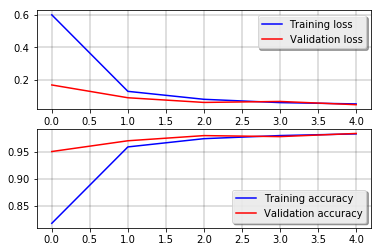

In [31]:
#plot perbandingan training loss dan validation loss
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

#plot perbandingan training acc dan validation acc
ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

Dalam kasus ini, kita dapat melihat bahwa seiring bertambahnya epoch, nilai *loss* kita semakin berkuran. Ini berarti CNN kita sedang belajar. Kita juga bsa melihat tidak ada perbedaan besar antara nilai *loss* dengan nilai *validation loss* itu menunjukkan tidak ada overfitting. Tentu performa ini dapat ditingkatkan, kita bisa membuat arsitektur CNN yang lebih kompleks agar dapat memberikan hasil yang lebih baik lagi.

## 4.2 Melakukan Visualisasi / Plotting Confusion Matrix

*Confusion Matrix* umumnya merupakan sebuah matrix 2x2. Masing-masing cell dalam matrix menunjukan pengukuran-pengukuran tertentu. Terdapat empat buah cell dalam *Confusion Matrix* 2x2, yakni:

1. __True Positive (TP)__: Dideteksi positif ternyata memang benar positif.
2. __True Negative (TN)__: Dideteksi positif ternyata negatif.
3. __False Positive (FP)__: Dideteksi negatif ternyata positif.
4. __False Negative (FN)__: Dideteksi negatif ternyata memang benar negatif.

Perhatikan gambar berikut untuk memahami Confusion Matrix secara singkat.

<img src="images/confusion_image1.png"> </img>
<p>
    <center><em>Gambar 10. Confusion Matrix 2x2, sumbu vertikal = class yang sebenarnya, sumbu horizontal = class yang diprediksi</em></center>
</p>

*Confusion Matrix* pada kasus ini adalah sebuah matrix ber-ordo 10x10 (ordo bergantung pada jumlah class/label dalam permasalahan klasifikasi yang dihadapi). Serupa dengan Confusion Matrix 2x2, sumbu vertikal menunjukkan class/label yang sebenarnya, dan sumbu horizontal menunjukkan class/label yang diprediksi oleh CNN.

Dalam kasus ideal, *Confusion Matrix* seharusnya berupa diagonal matrix. Seluruh cell dalam matrix kecuali yang diagonal bernilai 0. Situasi ini hanya akan terjadi jika CNN berhasil memprediksi seluruh label dengan tepat tanpa kesalahan. Namun, pada kasus nyata, situasi ini sangat jarang terjadi. Situasi yang lebih masuk akal porsi besar nilai akan berada pada cell-diagonal dan sisa cell-nya memiliki nilai yang cukup kecil. Perhatikan ilustrasi berikut.

<img src="images/confusion_image2.png" width=450> </img>
<p>
    <center><em>Gambar 11. Ilustrasi sederhana multi-class confusion matrix. Seperti yang dapat kita lihat, semakin banyak nilai yang ada pada cell-diagonal, semakin bagus performa klasifikasinya.</em></center>
</p>

In [32]:
#beberapa class dan libraries yang dibutuhkan untuk plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#berikut merupakan fungsi untuk plotting confusion matrix
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
#mari kita prediksi seluruh gambar dalam data validasi kita
ypred_onehot = model.predict(xval)
print(ypred_onehot)

[[9.2424654e-07 1.9241390e-03 9.6742924e-06 ... 8.6403513e-01
  6.7301613e-04 1.2844297e-01]
 [1.6998662e-12 5.1931370e-09 1.2949408e-07 ... 1.1093668e-09
  4.0568193e-09 1.0447165e-10]
 [1.5803133e-04 1.0322700e-05 1.1611953e-04 ... 5.9182138e-08
  8.0482219e-05 2.4150111e-06]
 ...
 [2.2710505e-09 4.4045848e-12 2.6465228e-08 ... 1.9574396e-05
  7.2608572e-07 9.9989069e-01]
 [1.8642364e-05 1.2593538e-05 1.2576254e-05 ... 6.5211218e-08
  7.5372081e-05 4.8751502e-08]
 [1.5899460e-10 8.3203240e-09 6.3925567e-05 ... 1.1104335e-04
  2.8935044e-06 4.9312820e-04]]


In [34]:
#hasil prediksi masih one-hot encoded, untuk memudahkan kita memahaminya, kita kembalikan lagi menjadi label
#dari [0.01, 0.02, 0.75, 0.01, 0.03, 0.1, 0.02, 0.01, 0.03, 0.02] --> 2 (kita lihat yang memiliki probabilitas tertinggi)
ypred = np.argmax(ypred_onehot,axis=1)
print(ypred)

[7 3 6 ... 9 6 3]


In [35]:
#sekarang kita mau membandingkan prediksi kita (ypred) dengan class yang sebenarnya,
#namun class yang sebenarnya (yang disimpan dalam variable yval) juga masih one-hot encoded, kita kembalikan juga jadi label
#dari [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] --> 2
ytrue = np.argmax(yval,axis=1)
print(ytrue)

[1 3 6 ... 9 6 3]


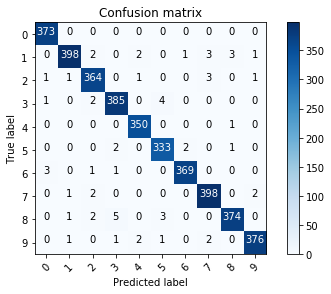

In [36]:
#sekarang karena prediksi kita (ypred) dan class yang sebenarnya (ytrue) sudah dalam bentuk label,
#saatnya kita masukkan kedalam confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)

#untuk memahami hasil confusion matrix, kita plot hasilnya dengan fungsi yang sudah kita definisikan sebelumnya
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

Dalam kasus ini, kita dapat melihat bahwa porsi cukup besar nilai berada pada cell diagonal dari *Confusion Matrix* kita. Terdapat beberapa prediksi yang tidak tepat, namun masih dapat ditoleransikan. Berikutnya kita akan melihat bagaimana cara kita untuk menganalisis lebih dalam lagi *Confusion Matrix* kita untuk mendapatkan deskiripsi yang lebih spesifik lagi.

## 4.3 Melakukan Visualisasi / Plotting Error

Meskipun kita sudah mengetahui performa model CNN kita berdarkan dua buah analisis sebelumnya, bukan berarti kita berhenti sampai disini. Kita masih dapat menggali informasi lebih dalam lagi: Apa yang meyebabkan CNN kita mengalami kegagalan dibeberapa prediksi? Pertanyaan ini menjadi motivasi pada bagian ini.

Memang benar bahwa di hampir setiap kasus penelitian *Deep Neural Network*, penyebab kegagalan prediksi berasal dari model CNN atau parameter yang kita tentukan, namun dalam beberapa kasus tertentu, bisa saja penyebab kegagalan berasal dari data kita sendiri. Dalam kasus ini, mungkin saja di dalam beberapa gambar, terdapat tulisan tangan angka yang begitu mirip dengan angka lainnya.

> __Sebagai contoh__, angka satu (1) di beberapa kasus bisa sangat mirip dengan angka tujuh (7). Angka empat (4) juga terkadang bisa tertukar dengan angka sembilan (9), dan seterusnya.

Maka dari itu, kita dapat memeriksa gambar apa yang sebenarnya diprediksi oleh model CNN kita. Ada beberapa tahapan logika yang bisa kita lakukan:

1. Kita kumpulkan gambar mana saja yang diprediksi salah oleh CNN.
2. Pada gambar tertentu, kita periksa nilai probabilitas angka-prediksi yang dipilih oleh CNN.
3. Masih dengan gambar tersebut, kita periksa nilai probabilitas angka-sebenarnya yang harusnya dipilih oleh CNN.
4. Jika perbedaan diantara kedua nilai tersebut terlalu besar, kita patut mencurigai gambar tersebut.

In [37]:
# yang mana aja sih yang error?
# --- kalo semua prediksinya tepat, ypred - ytrue pasti semuanya nol nilainya
# --- kalo ada yang ga tepat prediksinya (error), berarti ypred - ytrue ada yang enggak nol nilainya
errors = (ypred - ytrue != 0)

ypred_onehot_error = ypred_onehot[errors] # yang error emang prediksi nya apa sih?
ypred_labels_error = ypred[errors]        #    - label encoding
ytrue_onehot_error = yval[errors]         # yang error jawaban sebenernya apa sih?
ytrue_labels_error = ytrue[errors]        #    - label encoding
xval_error         = xval[errors]         # yang error gambarnya apa sih?

# setiap baris prediksi dari kumpulan prediksi yang salah,
# nilai probabilitas angka-prediksi tersebut terpilih oleh CNN berapa sih?
# --- dari kandidat-kandidat output sebuah gambar, ambil probabilitas yang tertinggi
# --- lakuin ini untuk seluruh prediksi gambar yang ada
ypred_error_probability = np.max(ypred_onehot_error, axis=1)

# setiap baris prediksi dari kumpulan prediksi yang salah,
# nilai probabilitas angka-sebenarnya yang harusnya dipilih oleh CNN berapa sih?
# --- perkalian matrix ypred_onehot_error dan ytrue_onehot_error akan menyisakan nilai probabilitas angka-sebenarnya yang harusnya dipilih
# --- untuk ngambil nilai tersebut, berhubung nilai yang lain 0 semua, maka di sum saja ke kanan (nilainya ga bakal pengaruh)
ytrue_error_probability = np.sum( (ypred_onehot_error*ytrue_onehot_error), axis=1 )

# kita punya nilai probabilitas angka-prediksi yg terpilih oleh CNN,
# kita punya nilai probabilitas angka-sebenarnya yg harusnya dipilih CNN
# --- semakin jauh perbedaan kedua nilai tersebut, CNN sangat terkecoh oleh gambar tersebut
# --- itu berarti, mungkin saja gambarnya yang mencurigakan (yang nulis angkaya ngaco)
delta_YpredYtrue_errorProbability = ypred_error_probability - ytrue_error_probability

# sekarang kita sort, mana sih yang paling mencurigakan,
# pas ngesort, harus disimpen urutannya (indexnya),
# supaya nanti bisa ditampilin gambar dengan index yang bersangkutan,
# --- pake np.argsort, dia ngembaliin index-index yang yang punya isi nilai terkecil sampe terbesar
# --- yang paling mencurigakan = yang paling gede nilainya = yang terbawah
sorted_delta_index = np.argsort(delta_YpredYtrue_errorProbability)

# kita ambil 6 yang paling mencurigakan
top_n_error = 6
most_ridiculous_error = sorted_delta_index[-top_n_error:]

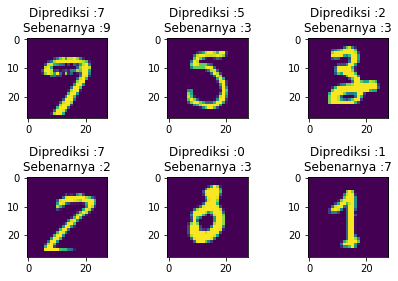

In [38]:
#tampilkan yang prediksi yang paling ngaco mencurigakan itu
for i in range (0, top_n_error):
    image = xval_error[most_ridiculous_error[i]].reshape((28,28))
    
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title("Diprediksi :{}\nSebenarnya :{}".format(ypred_labels_error[most_ridiculous_error[i]], ytrue_labels_error[most_ridiculous_error[i]]));

plt.tight_layout()

Gambar yang ditampilkan merupakan gambar dengan prediksi yang paling buruk (tingkat keyakinan/probabilitas prediksi tinggi sementara prediksi tersebut salah total). Jika kita lihat baik-baik, ternyata akar permasalahannya berasal dari gambar yang ingin kita prediksi. Beberapa diantaranya memang memiliki makna yang ambigu, mungkin cukup sulit dibedakan bahkan untuk manusia sendiri.

__Namun perlu diperhatikan__, kejadian ini merupakan hal yang wajar. Tidak semua data yang kita punya merupakan data yang sempurna. Pasti diantara gambar yang kita miliki terdapat kecacatan yang tidak bisa kita cegah keberadaannya. __Dan perlu diingat__ juga, data tersebut juga mungkin menjadi salah satu data untuk training model CNN kita. Disinilah tantangan yang sebenarnya muncul, apakah model CNN kita mampu menghadapi persoalan ini?

# 5. Prediksi Data Test dan Penyimpanan

Sampai ditahap ini kita telah melakukan seluruh tahapan yang ada, dimulai dari: 

1. Melakukan pre-proses data
2. Membangun model CNN, dan
3. Mengevaluasi hasil.

Dari evaluasi, kita mendapatkan bahwa model CNN kita dengan cukup baik melakukan klasifikasi *handwritten-digit*. Itu berarti, model CNN kita sudah siap untuk dipakai dalam kasus nyata; misalnya jika kita punya data gambar *handwritten-digit* lain yang belum pernah dilihat sebelumnya, kita bisa menggunakan model CNN kita untuk melakukan klasifikasi.

## 5.1 Prediksi Data

Masih ingat variable *test* yang kita gunakan untuk menampung data testing kita (yang tidak memiliki informasi label pada kolom pertamanya), kita bisa gunakan variabel tersebut untuk kita prediksi: berapa angka sebenarnya yang tertulis pada gambar tersebut. Setelah model CNN kita melakukan prediksi, kita evaluasi secara kualitatif hasil-hasil prediksinya, dengan cara membandingkannya secara langsung dengan gambarnya

> __Terdapat sebuah kompetisi__, yang diselenggarakan oleh KAGGLE (salah satu penyedia dataset deep learning), yang tujukan untuk memotivasi para peneliti Deep Learning untuk menemukan model-model *Deep Neural Network* yang lebih mutakhir. Hasil prediksi yang dikeluarkan oleh model yang kita buat dapat kita kirim, dan jika model *Deep Neural Network* yang kita punya melampaui performa peserta-peserta lain, kita berhak menerima hadiah.

In [39]:
# sekarang, model CNN yang kita buat, kita suruh untuk memprediksi data testing.
predictions = model.predict_classes(test, verbose=1)

27968/28000 [============================>.] - ETA: 0s

In [40]:
# cetak informasi variable prediksi
print('Tipe data predictions : ', type(predictions))
print('Isi data predictions  : ', predictions)

Tipe data predictions :  <class 'numpy.ndarray'>
Isi data predictions  :  [2 0 9 ... 3 9 2]


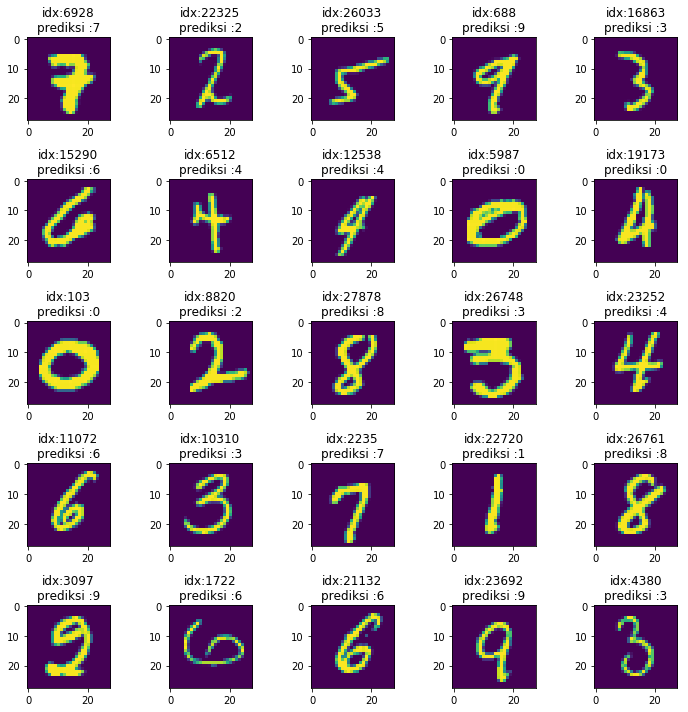

In [41]:
# berapa banyak gambar yang mau ditampilkan
number_image_shown = 25

# berapa banyak gambar pada sisi koleksi subplot kita
subplot_sides = int(np.sqrt(number_image_shown))

# generate nilai secara acak, nantinya kita gunakan sebagai indeks untuk pengambilan gambar
random_image_index = np.random.choice(num_test, number_image_shown, replace=False)

# nilai awal indeks, nantinya kita gunakan untuk mengambil nilai acak dalam random_image_index satu-persatu
idx = 0

# buat subplot (subplot_sides x subplot_sides)
f, plots = plt.subplots(subplot_sides, subplot_sides, figsize=(10,10))

# loop untuk setiap subplot yang ada
for i in range (0, subplot_sides):
    for j in range (0, subplot_sides):
        
        # ambil data gambar secara acak, sekaligus reshape menjadi gambar berukuran (28,28)
        image = test[random_image_index[idx]].reshape((28,28))
        # tampilkan gambar dalam subplot
        plots[i,j].imshow(image)
        # tampilkan judul subplot
        plots[i,j].set_title("idx:{}\nprediksi :{}".format(random_image_index[idx], predictions[random_image_index[idx]]))
        # indeks berikutnya
        idx = idx+1

# supaya gambarnya tidak mepet2
plt.tight_layout()

## 5.2 Menyimpan Hasil dan Model CNN kita

Jika kita ingin menyimpan dokumentasi prediksi model CNN kita (atau jika ingin mengikuti kompetisi), kita bisa menyimpan hasil klasifikasi handwritten-digit kedalam sebuah file berekstensi __.CSV__. Jika kita ingin menyimpan model CNN kita, bila sewaktu-waktu akan kita perlukan untuk keperluan penelitian lainnya atau pembuatan aplikasi end-user, kita juga bisa menyimpan nya ke dalam sebuah file berekstensi __.h5__

In [ ]:
# simpan hasil prediksi
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                            "Label": predictions})

submissions.to_csv("mnist2908.csv", index=False, header=True)

In [ ]:
# simpan model
from keras.models import load_model

model.save('my_model.h5')

# 6. Penutup

Dengan demikian, telah selesai pembahasan kita mengenai dasar implementasi CNN untuk MNIST-Dataset. Perlu dipahami bahwa apa yang bahas dalam notebook ini merupakan kerangka kerja yang paling dasar dan umum untuk digunakan. Untuk penelitian nyata, tentu akan ada hal-hal teknis yang harus dilakukan untuk disesuaikan dengan kasus dalam penelitian tersebut. Meskipun demikian, jika Anda dapat memahami dan mengikuti satu-per-satu tahapan-tahapan yang ada, maka Anda telah memiliki pemahaman yang cukup kuat dalam implementasi aplikasi *Deep Learning*.

Terima kasih, dan semoga berhasil!